# Warm up

The code below showcases a convolutional network in Keras. It was designed to classify 100x100 rgb images into 10 classes.
This network... quite frankly, it sucks. Can you guess what's the problem? Is there just one problem?

In [1]:
import keras
import keras.layers as L
import keras.initializers as init
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

In this exercise you have to train a new Convolutional Neural Network from scratch for the classification of images.

1. For this we will use the Keras library.
2. The aim is to achieve 99% accuracy (on validation/test set) the MNIST dataset http://yann.lecun.com/exdb/mnist/.
3. We have provided a basic Keras implementation of a CNN.
4. You are allowed to do whatever you want (except copy pasting) with the network as long as it is explained in your report.
5. Feel free to change the architecture of the network as well as parameters (e.g. learning rate, kernel sizes, ...).
6. You can try to guess parameters manually of you want, just make sure that it performs better than 99% on the validation set.
7. Sketch the final network architecture in your report.
8. Make sure you train the network on the GPU, otherwise it will be too slow.
9. Explain the plots: learning curve, accuracy wrt epoch.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
net = keras.models.Sequential()

net.add(L.InputLayer([28, 28, 1]))



net.add(L.Conv2D(filters=16, kernel_size=(5, 5)))
net.add(L.Activation('relu'))

net.add(L.MaxPool2D(pool_size=(2,2)))

net.add(L.Conv2D(filters=32, kernel_size=(3, 3)))
net.add(L.Activation('relu'))

net.add(L.MaxPool2D(pool_size=(2,2)))

net.add(L.Conv2D(filters=64, kernel_size=(3, 3)))
net.add(L.Activation('relu'))

net.add(L.MaxPool2D(pool_size=(2,2)))

net.add(L.Flatten()) 

net.add(L.Dropout(rate=0.4))

net.add(L.Dense(units=10))
net.add(L.Activation('softmax'))


In [6]:
batch_size = 64
epochs = 14

net.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = net.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3)



Epoch 1/14
657/657 [==============================] - 22s 32ms/step - loss: 0.9965 - accuracy: 0.6722 - val_loss: 0.1439 - val_accuracy: 0.9562
Epoch 2/14
657/657 [==============================] - 21s 32ms/step - loss: 0.2373 - accuracy: 0.9277 - val_loss: 0.1040 - val_accuracy: 0.9693
Epoch 3/14
657/657 [==============================] - 21s 33ms/step - loss: 0.1758 - accuracy: 0.9483 - val_loss: 0.0901 - val_accuracy: 0.9725
Epoch 4/14
657/657 [==============================] - 22s 33ms/step - loss: 0.1491 - accuracy: 0.9562 - val_loss: 0.0758 - val_accuracy: 0.9777
Epoch 5/14
657/657 [==============================] - 21s 33ms/step - loss: 0.1263 - accuracy: 0.9626 - val_loss: 0.0693 - val_accuracy: 0.9796
Epoch 6/14
657/657 [==============================] - 22s 33ms/step - loss: 0.1126 - accuracy: 0.9656 - val_loss: 0.0654 - val_accuracy: 0.9816
Epoch 7/14
657/657 [==============================] - 22s 33ms/step - loss: 0.1030 - accuracy: 0.9701 - val_loss: 0.0590 - val_accuracy:

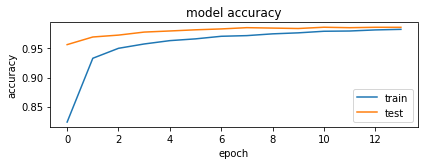

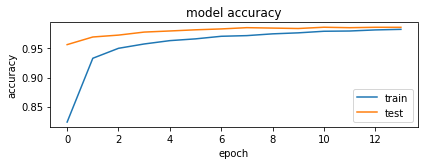

In [7]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


plt.tight_layout()

fig

In [8]:
score = net.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03968571871519089
Test accuracy: 0.9894999861717224
